# DATA ANALYSE

## Démarches pour la partie analyse :

#### Analyse de forme

- La variable cible est la colonne 'charges', qui se trouve être le coût de la prime d'assurance pour chaque usager.
- Lignes et colonnes : (1337, 7)
- Type de variable : 4 quantitatives, 3 qualitatives
    - age       1338 non-null   int64  
    - sex       1338 non-null   object 
    - bmi       1338 non-null   float64
    - children  1338 non-null   int64  
    - smoker    1338 non-null   object 
    - region    1338 non-null   object 
    - charges   1338 non-null   float64

#### Analyse de fond

- Valeurs manquantes : Aucune valeur n'est manquante dans ce jeu de données.

- Doublons : Il y a 1 seul doublon dans les données.

- Données éronnées : Il ne semble pas avoir de données éronnées car toutes les données possèdent le même type dans chaque colonne.

- Valeurs abbérantes : Après avoir fait un box-plot de la cible, on peut voir une série de données sortir du lot, vu le faible nombre de données, celles-ci sont sûrement de simples données atypiques. Quelques valeurs atypiques apparaissent également dans la colonne 'bmi'.

#### Analyses univariées de chaque variable avec la variable cible :

Hypothèses :    

- Avec les premières observations, il semblerait que plus l'usager prend de l'âge et plus le coût de sa prime d'assurance est élevé.

- Malgré une répartition équitable des données sur le sexe des usagers, les hommes semblent payer plus cher leur prime d'assurance. Cela pourrait s'expliquer par le fait que les hommes ont une espérance de vie plus réduite que les femmes et sont plus sujets aux accidents que celles-ci.

- L'on peut très nettement observer visuellement qu'il y a une forte incidence entre le fait de fumer ou non sur le montant de la prime.

- On peut tout d'abord observer visuellement une distribution quasi normale de la variable 'bmi'. Ensuite l'on distingue deux groupes différents dans l'analyse de la bmi et avec la variable cible : Dans le premier groupe on voit que la bmi est corrélée à la cible, dans l'autre non. On imagine que la précédente variable étudiée a une incidence sur la bmi et donc sur le prix de la prime, c'est pourquoi on a ajouté la variable 'smoker' à notre analyse afin de valider les résultats. L'hypothèse est que le fait d'être fumeur influence négativement la bmi des usagers, et comme le fait d'être fumeur influence positivement la variable cible, cela change les résultats de l'analyse.

- Même si à première vue, dans nos analyse il semble avoir une hausse de la prime dans la région du "sud-est". Il ne semble pas y avoir de corrélation entre la région et le montant de la prime, car le pic dans le "sud-est" pourrait s'expliquer par le fait que nous avons plus de données dans cette région que dans les autres.

#### Vérification des hypothèses établies

- Être fumeur a un impact sur la bmi : À la suite de nos analyse sur la bmi et le poids, on en déduit qu'il n'y a pas de corrélation entre la bmi et le fait de fumer ou non (corrélation de 0.0395), c'est pourquoi on peut en déduire que deux groupes se distinguent parce que le fait d'être fumeur fait augmenter le prix de la prime d'assurance (corrélation de 0.787 pour les fumeurs)

## Nettoyage des données et premières analyses

### Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from scipy.stats import f_oneway, mannwhitneyu, kruskal, pointbiserialr
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures

### Création du Dataframe

In [2]:
df = pd.read_csv('../csv/donnees.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot: >

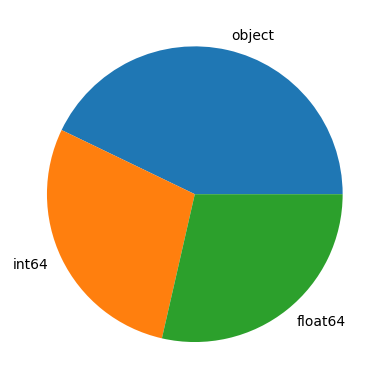

In [5]:
df.dtypes.value_counts().plot.pie()

In [6]:
df['charges'].max()

63770.42801

In [7]:
def charge(charge, range):
    paquets = np.arange(0,70000,range)

    list_paquets = []

    for paquet in paquets:
        if charge < paquet:
            return int(paquet)

In [8]:
# paquet_charges = [1000, 3000, 5000]

# df[f"charges_{paquet_charges[0]}"] = df['charges'].apply(lambda x : charge(x, paquet_charges[0]))
# df[f"charges_{paquet_charges[1]}"] = df['charges'].apply(lambda x : charge(x, paquet_charges[1]))
# df[f"charges_{paquet_charges[2]}"] = df['charges'].apply(lambda x : charge(x, paquet_charges[2]))

# df

In [9]:
# df[f"charges_{paquet_charges[2]}"].value_counts(normalize=True)

### Valeurs manquantes

In [10]:
df['smoker'] = df['smoker'].apply(lambda x : 'Oui' if x == "yes" else 'Non')

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Doublons

In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,Non,northwest,1639.5631


In [13]:
df.drop_duplicates(inplace=True)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,Oui,southwest,16884.92400
1,18,male,33.770,1,Non,southeast,1725.55230
2,28,male,33.000,3,Non,southeast,4449.46200
3,33,male,22.705,0,Non,northwest,21984.47061
4,32,male,28.880,0,Non,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,Non,northwest,10600.54830
1334,18,female,31.920,0,Non,northeast,2205.98080
1335,18,female,36.850,0,Non,southeast,1629.83350
1336,21,female,25.800,0,Non,southwest,2007.94500


### Données érronnées

In [14]:
df['age'].unique().dtype

dtype('int64')

In [15]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
df['bmi'].unique().dtype

dtype('float64')

In [17]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [18]:
df['smoker'].unique()

array(['Oui', 'Non'], dtype=object)

In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
df['charges'].unique().dtype

dtype('float64')

### Valeurs Abérrantes

In [21]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


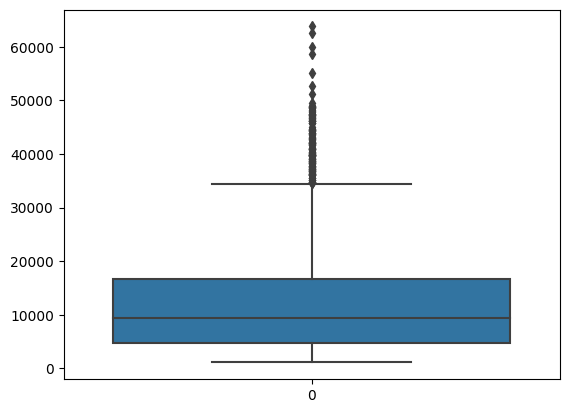

In [22]:
sns.boxplot(df['charges'])
plt.show()

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

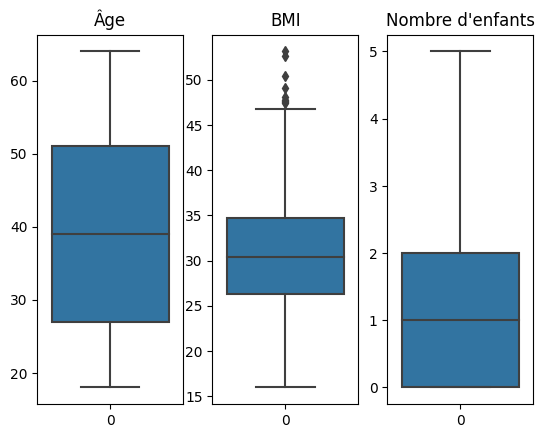

In [24]:
plt.subplot(1,3,1)
sns.boxplot(df['age'])
plt.title('Âge')

plt.subplot(1,3,2)
sns.boxplot(df['bmi'])
plt.title('BMI')

plt.subplot(1,3,3)
sns.boxplot(df['children'])
plt.title('Nombre d\'enfants')

plt.show()

<AxesSubplot: >

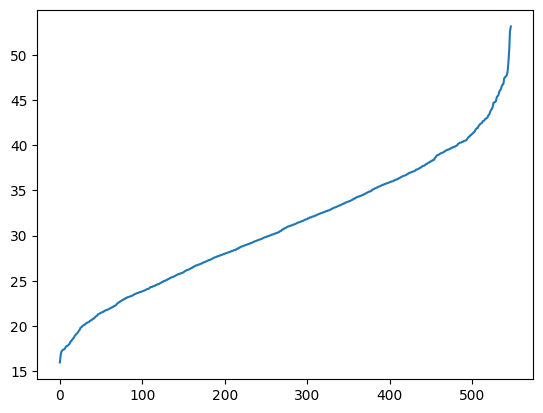

In [25]:
sns.lineplot(df['bmi'].sort_values().unique())

In [26]:
test = df[df['charges']>35000]

test

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,Oui,southeast,39611.75770
19,30,male,35.300,0,Oui,southwest,36837.46700
23,34,female,31.920,1,Oui,northeast,37701.87680
29,31,male,36.300,2,Oui,southwest,38711.00000
30,22,male,35.600,0,Oui,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,Oui,southeast,62592.87309
1301,62,male,30.875,3,Oui,northwest,46718.16325
1303,43,male,27.800,0,Oui,southwest,37829.72420
1313,19,female,34.700,2,Oui,southwest,36397.57600


In [27]:
test['smoker'].value_counts()

Oui    130
Non      3
Name: smoker, dtype: int64

In [28]:
test[test['smoker'] == 'Non']

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.80,1,Non,southwest,35160.13457
1012,61,female,33.33,4,Non,southeast,36580.28216
1206,59,female,34.80,2,Non,southwest,36910.60803


In [29]:
masques = [test['bmi'] > 40, test['age'] > 50]

combo_mask = masques[0]

for masque in masques:
    combo_mask += masque

test2 = test[combo_mask]

test.drop(test2.index, axis=0)

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.30,0,Oui,southwest,36837.46700
23,34,female,31.92,1,Oui,northeast,37701.87680
29,31,male,36.30,2,Oui,southwest,38711.00000
30,22,male,35.60,0,Oui,southwest,35585.57600
34,28,male,36.40,1,Oui,southwest,51194.55914
...,...,...,...,...,...,...,...
1249,32,male,33.63,1,Oui,northeast,37607.52770
1288,20,male,39.40,2,Oui,southwest,38344.56600
1300,45,male,30.36,0,Oui,southeast,62592.87309
1303,43,male,27.80,0,Oui,southwest,37829.72420


In [30]:
# df.drop(test2.index, axis=0, inplace=True)

### Arrondir les floats

In [31]:
df['bmi'] = df['bmi'].apply(lambda x : round(x, 1))
df['charges'] = df['charges'].apply(lambda x : round(x, 2))

## Analyses préléminaires

### Histogrammes de chaque variable.

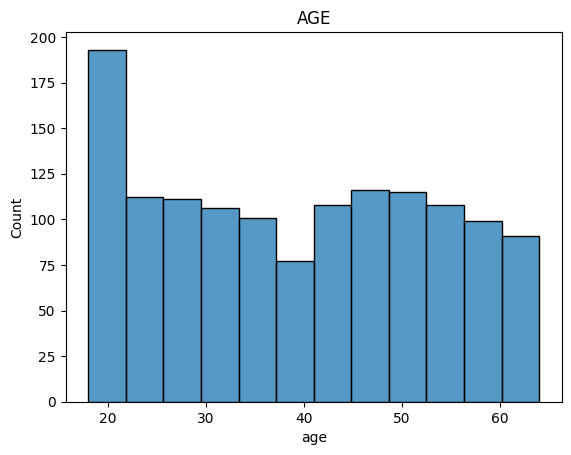

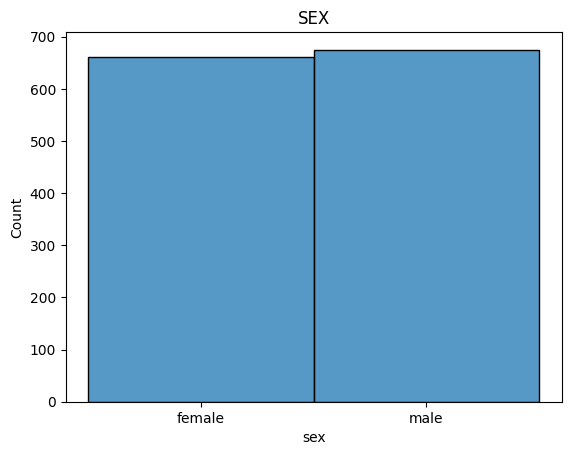

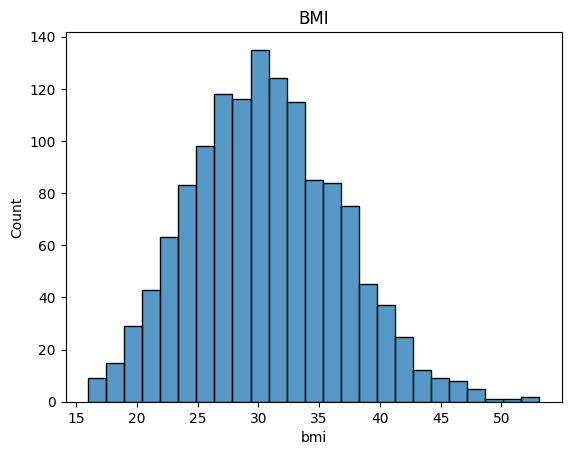

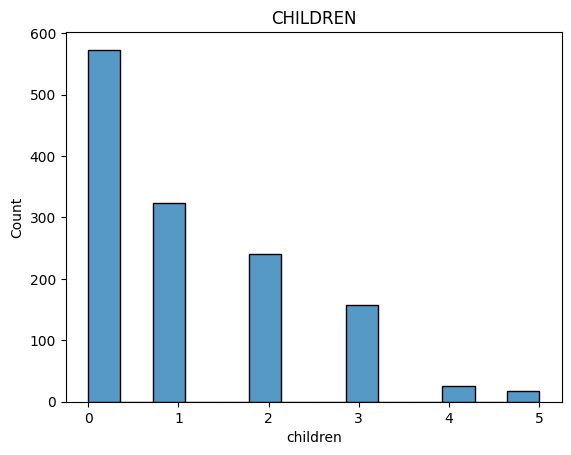

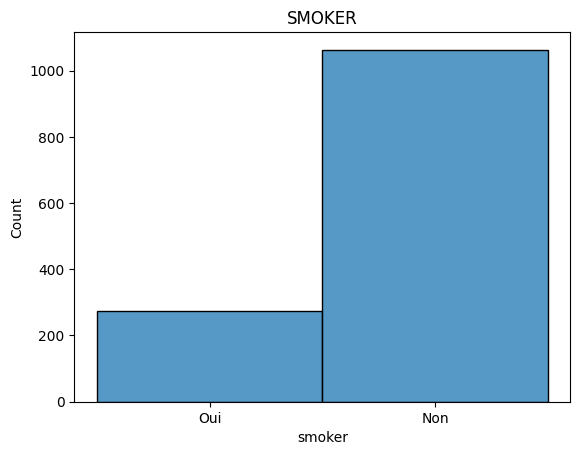

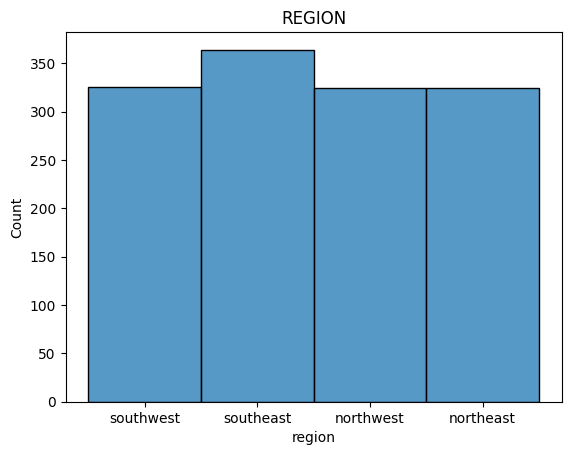

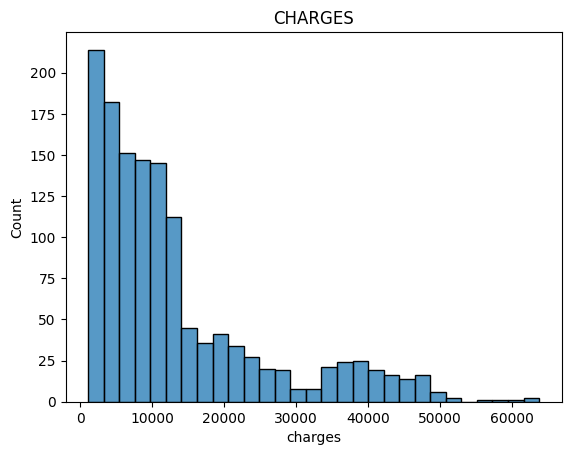

In [32]:
for col in df:
    plt.figure()
    sns.histplot(df[col])
    plt.title(f"{col.upper()}")
    plt.show()

In [33]:
# df.drop([f"charges_{paquet_charges[0]}", f"charges_{paquet_charges[1]}", f"charges_{paquet_charges[2]}"], axis=1, inplace=True)

### Analyse des variables qualitatives

In [34]:
for col in df.select_dtypes('object'):
    print(f"{col :-<10} {df[col].unique()}")

sex------- ['female' 'male']
smoker---- ['Oui' 'Non']
region---- ['southwest' 'southeast' 'northwest' 'northeast']


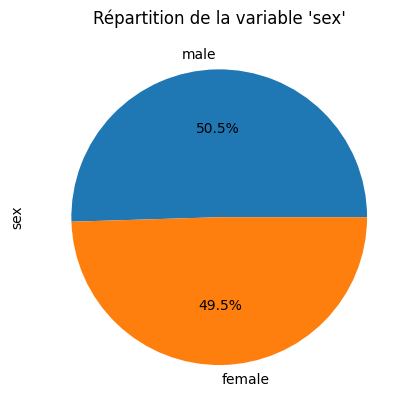

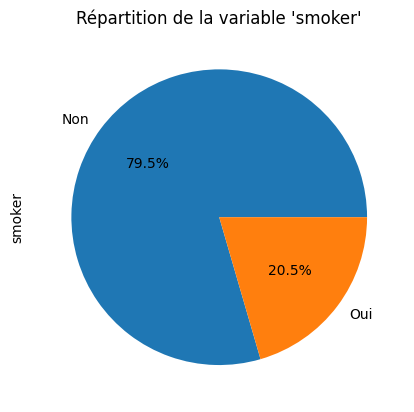

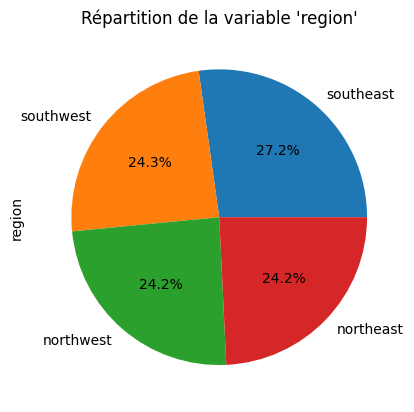

In [35]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot(kind='pie',title=f"Répartition de la variable '{col}'", autopct='%.1f%%')

## Analyses univariées par rapport à la cible

### Prime d'assurance des usagers

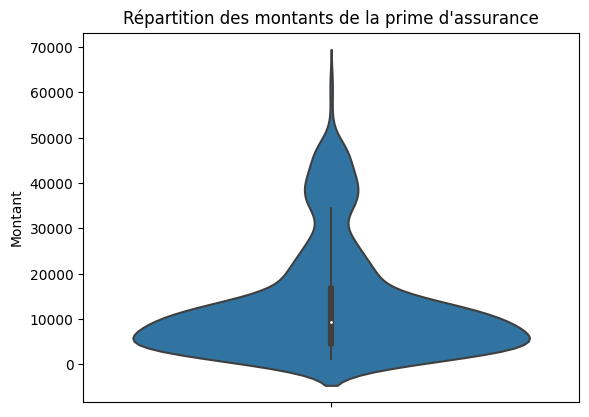

In [36]:
sns.violinplot(df, y='charges')
plt.title('Répartition des montants de la prime d\'assurance')
plt.ylabel('Montant')
plt.show()

### Âge des usagers

In [37]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

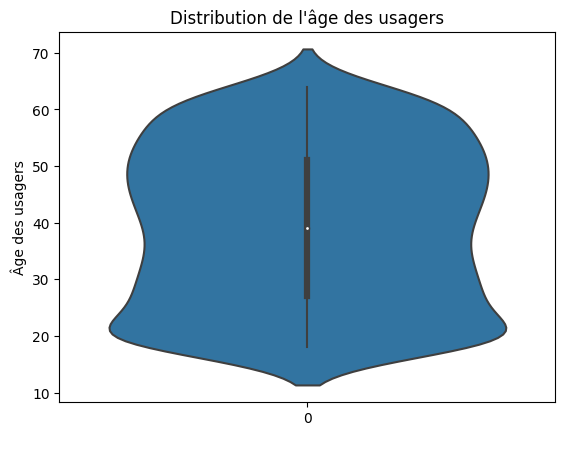

In [38]:
sns.violinplot(df['age'])
plt.title('Distribution de l\'âge des usagers')
plt.xlabel(' ')
plt.ylabel('Âge des usagers')
plt.show()

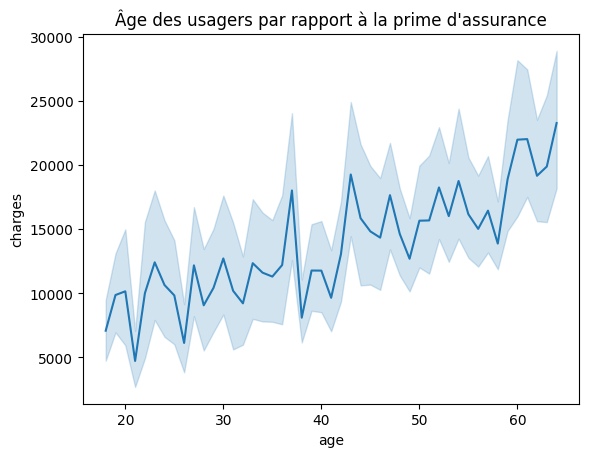

In [39]:
plt.figure()
sns.lineplot(df, x='age', y='charges')
plt.title("Âge des usagers par rapport à la prime d'assurance")
plt.show()

Il semble y avoir une corrélation entre l'âge de l'usager et le montant de la prime d'assurance.

### Sexe des usagers

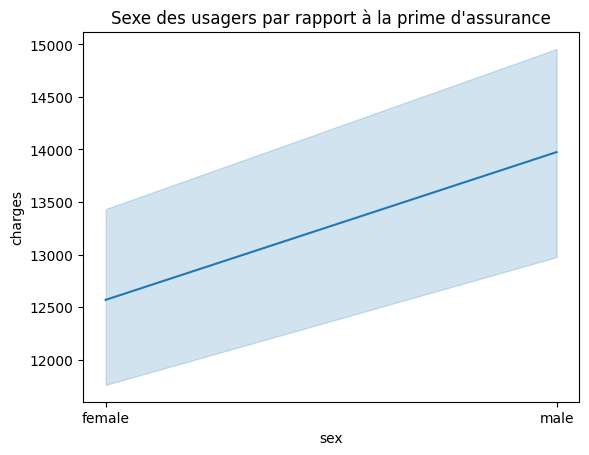

In [40]:
plt.figure()
sns.lineplot(df, x='sex', y='charges')
plt.title("Sexe des usagers par rapport à la prime d'assurance")
plt.show()

Les hommes semblent payer plus cher que les femmes.

### Répartition des fumeurs ou et non-fumeurs

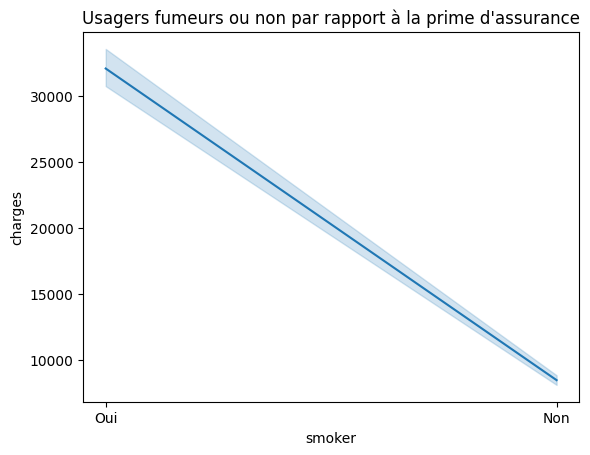

In [41]:
plt.figure()
sns.lineplot(df, x='smoker', y='charges')
plt.title("Usagers fumeurs ou non par rapport à la prime d'assurance")
plt.show()

Il y a un fort impact entre le fait d'être fumeur ou non sur le coût de la prime d'assurance

### BMI des usagers

In [42]:
df['bmi'].describe()

count    1337.000000
mean       30.663500
std         6.100584
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

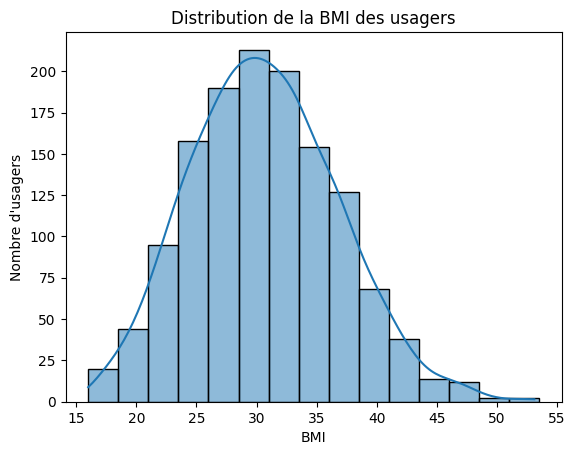

In [43]:
sns.histplot(df['bmi'], binwidth=2.5, stat='count', kde=True)
plt.title('Distribution de la BMI des usagers')
plt.xlabel('BMI')
plt.ylabel('Nombre d\'usagers')
plt.show()

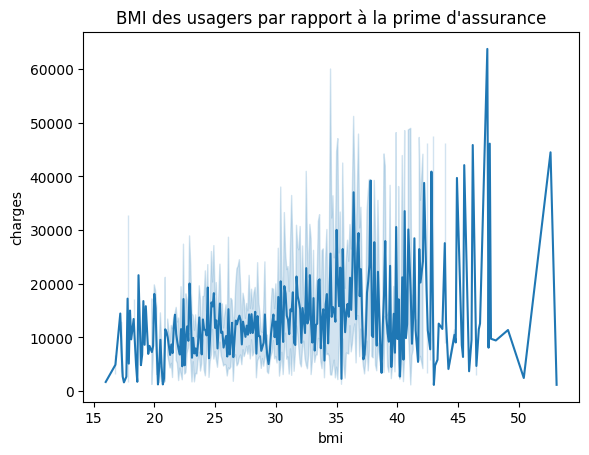

In [44]:
plt.figure()
sns.lineplot(df, x='bmi', y='charges')
plt.title("BMI des usagers par rapport à la prime d'assurance")
plt.show()

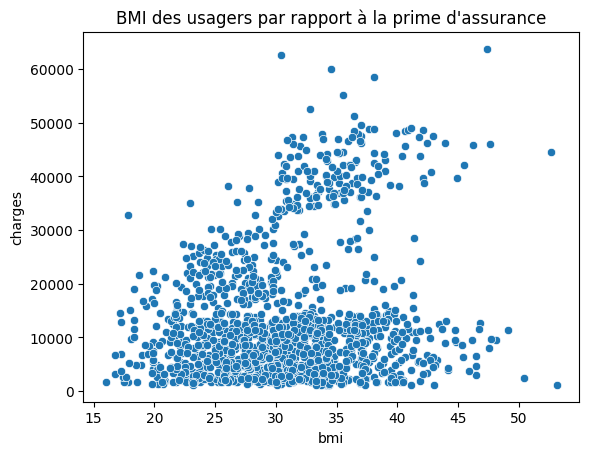

In [45]:
plt.figure()
sns.scatterplot(df, x='bmi', y='charges')
plt.title("BMI des usagers par rapport à la prime d'assurance")
plt.show()

D'un côté il semble y avoir une corrélation entre la bmi de l'usager et le prix de la prime, de l'autre côté il semble ne pas en avoir, peut-être qu'une autre variable interfère avec le résultat.

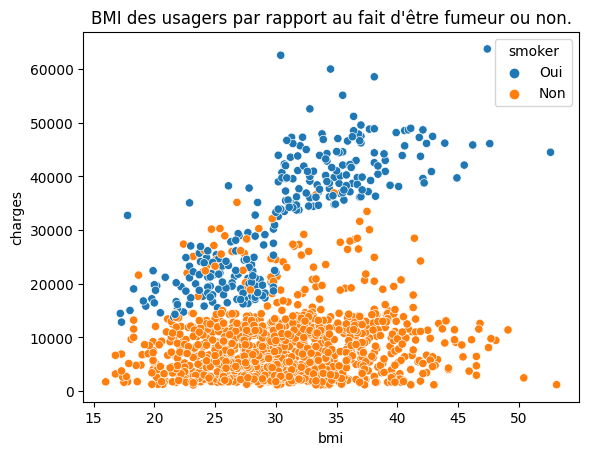

In [46]:
plt.figure()
sns.scatterplot(df, x='bmi', y='charges', hue='smoker')
plt.title("BMI des usagers par rapport au fait d'être fumeur ou non.")
plt.show()

In [77]:
pd.crosstab(df['bmi'], df['smoker']).corr()

smoker,Non,Oui
smoker,,
Non,1.000000,0.293656
Oui,0.293656,1.000000


### Enfants des usagers

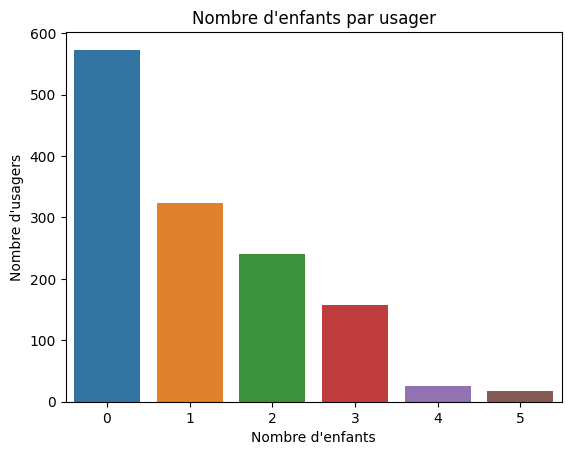

In [47]:
child = pd.DataFrame(df['children'].value_counts())
sns.barplot(child, y='children', x=child.index)
plt.title('Nombre d\'enfants par usager')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Nombre d\'usagers')
plt.show()

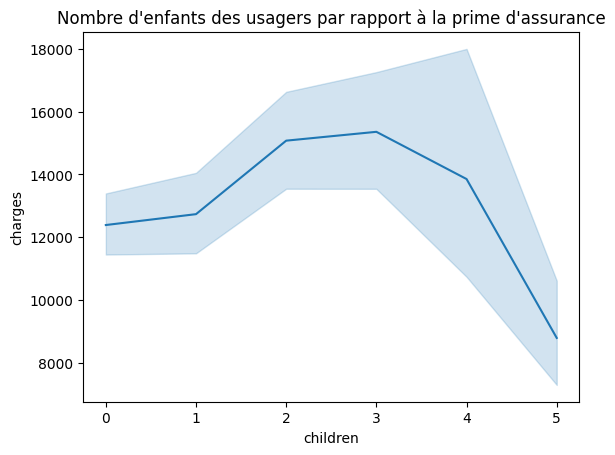

In [48]:
plt.figure()
sns.lineplot(df, x='children', y='charges')
plt.title("Nombre d'enfants des usagers par rapport à la prime d'assurance")
plt.show()

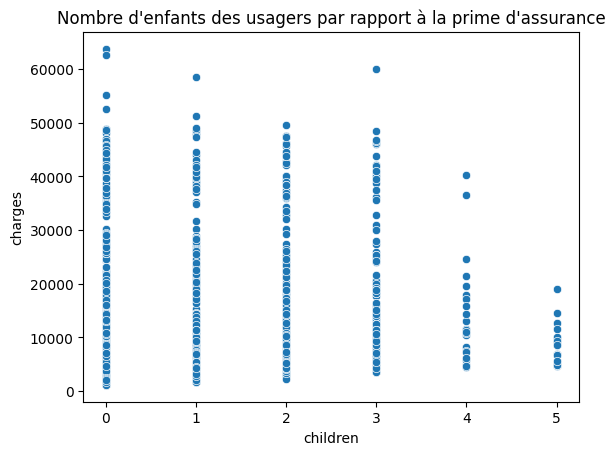

In [49]:
plt.figure()
sns.scatterplot(df, x='children', y='charges')
plt.title("Nombre d'enfants des usagers par rapport à la prime d'assurance")
plt.show()

Aux premmiers abords le nombre d'enfants ne semblent pas influencer le montant de la prime.

### Régions des usagers

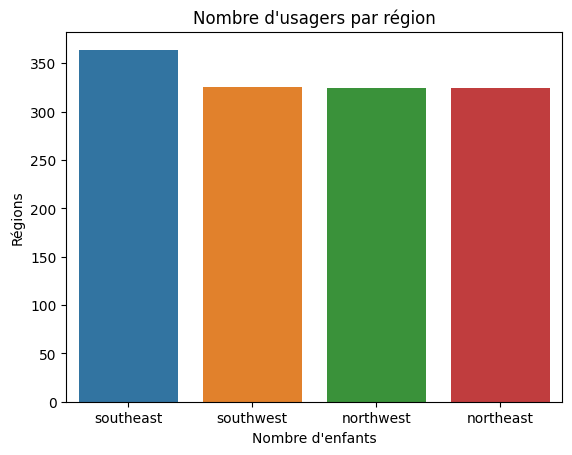

In [50]:
region = pd.DataFrame(df['region'].value_counts())
sns.barplot(region, y='region', x=region.index)
plt.title('Nombre d\'usagers par région')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Régions')
plt.show()

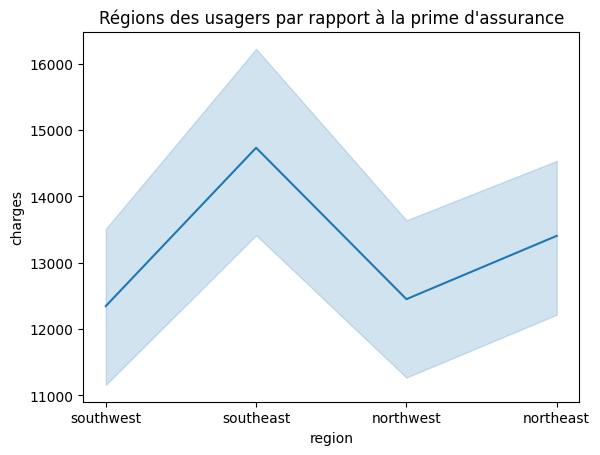

In [51]:
plt.figure()
sns.lineplot(df, x='region', y='charges')
plt.title("Régions des usagers par rapport à la prime d'assurance")
plt.show()

Il ne semble pas y avoir de corrélation entre la région et le montant de la prime, car le pic dans le "sud-est" pourrait s'expliquer par le fait que nous avons plus de données dans cette région.

## Corrélation de chaque variable avec la prime d'assurance.

In [52]:
test = df.copy()

test

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,Oui,southwest,16884.92
1,18,male,33.8,1,Non,southeast,1725.55
2,28,male,33.0,3,Non,southeast,4449.46
3,33,male,22.7,0,Non,northwest,21984.47
4,32,male,28.9,0,Non,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,Non,northwest,10600.55
1334,18,female,31.9,0,Non,northeast,2205.98
1335,18,female,36.9,0,Non,southeast,1629.83
1336,21,female,25.8,0,Non,southwest,2007.94


In [53]:
label_encoder = LabelEncoder()

In [54]:
test['smoker'] = label_encoder.fit_transform(test['smoker'])
test['sex'] = label_encoder.fit_transform(test['sex'])
test['region'] = label_encoder.fit_transform(test['region'])

test

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.94


In [55]:
def fumeur(x):
    if x == 'Oui':
        return 1
    else : return 0

df_bmi = pd.concat([df['smoker'].apply(lambda x : fumeur(x)), df['bmi']], axis=1)

df_bmi

,smoker,bmi
0,1,27.9
1,0,33.8
2,0,33.0
3,0,22.7
4,0,28.9
...,...,...
1333,0,31.0
1334,0,31.9
1335,0,36.9
1336,0,25.8


In [56]:
df_bmi.corr()

,smoker,bmi
smoker,1.00000,0.00395
bmi,0.00395,1.00000


In [57]:
print(pointbiserialr(df_bmi['smoker'], df_bmi['bmi']))

SignificanceResult(statistic=0.003950230941971891, pvalue=0.8852590776589534)


In [58]:
def bmi(bmi):
    if bmi < 18.5:
        return "maigreur"
    elif bmi < 25:
        return "normal"
    elif bmi < 30:
        return "surpoids"
    elif bmi < 35:
        return "obesite_moderee"
    elif bmi < 40:
        return "obesite_severe"
    else:
        return "obesite_morbide"

df_bmi['bmi'] = df_bmi['bmi'].apply(lambda x : bmi(x))

<AxesSubplot: xlabel='bmi', ylabel='count'>

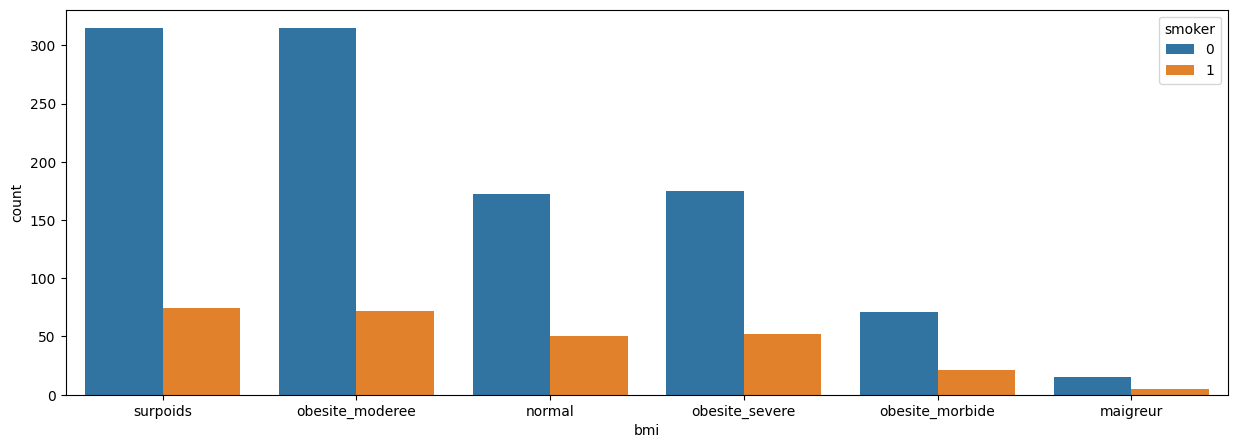

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(df_bmi, x='bmi', hue='smoker')

À la suite de nos analyse sur la bmi et le poids, on en déduit qu'il n'y a pas de corrélation entre la bmi et le fait de fumer ou non.

In [60]:
test.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109432,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058045
bmi,0.109432,0.046397,1.000000,0.012678,0.003950,0.157572,0.198641
children,0.041536,0.017848,0.012678,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003950,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157572,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058045,0.198641,0.067389,0.787234,-0.006547,1.000000


In [61]:
correlation = test.corr()
correlation = pd.DataFrame(correlation['charges'])
correlation.sort_values('charges', ascending=False, inplace=True)
# correlation = correlation.iloc[:3,:]

correlation

,charges
charges,1.000000
smoker,0.787234
age,0.298308
bmi,0.198641
children,0.067389
sex,0.058045
region,-0.006547


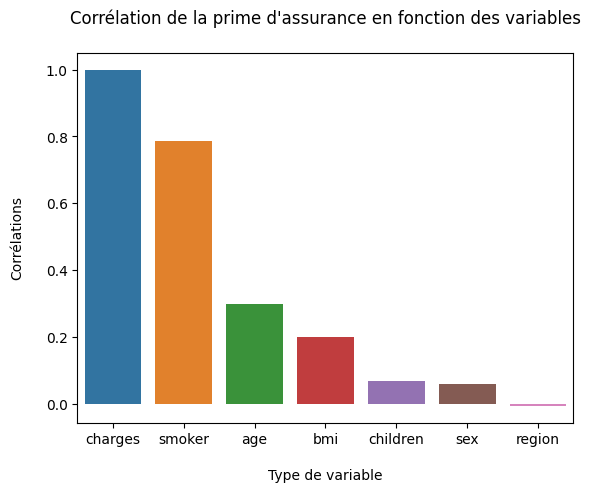

In [62]:
sns.barplot(correlation, y='charges', x=correlation.index)
plt.title('Corrélation de la prime d\'assurance en fonction des variables\n')
plt.xlabel('\nType de variable')
plt.ylabel('Corrélations\n')

plt.show()

<AxesSubplot: >

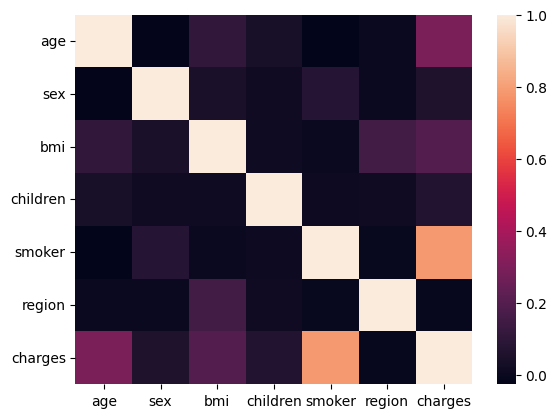

In [63]:
sns.heatmap(test.corr())

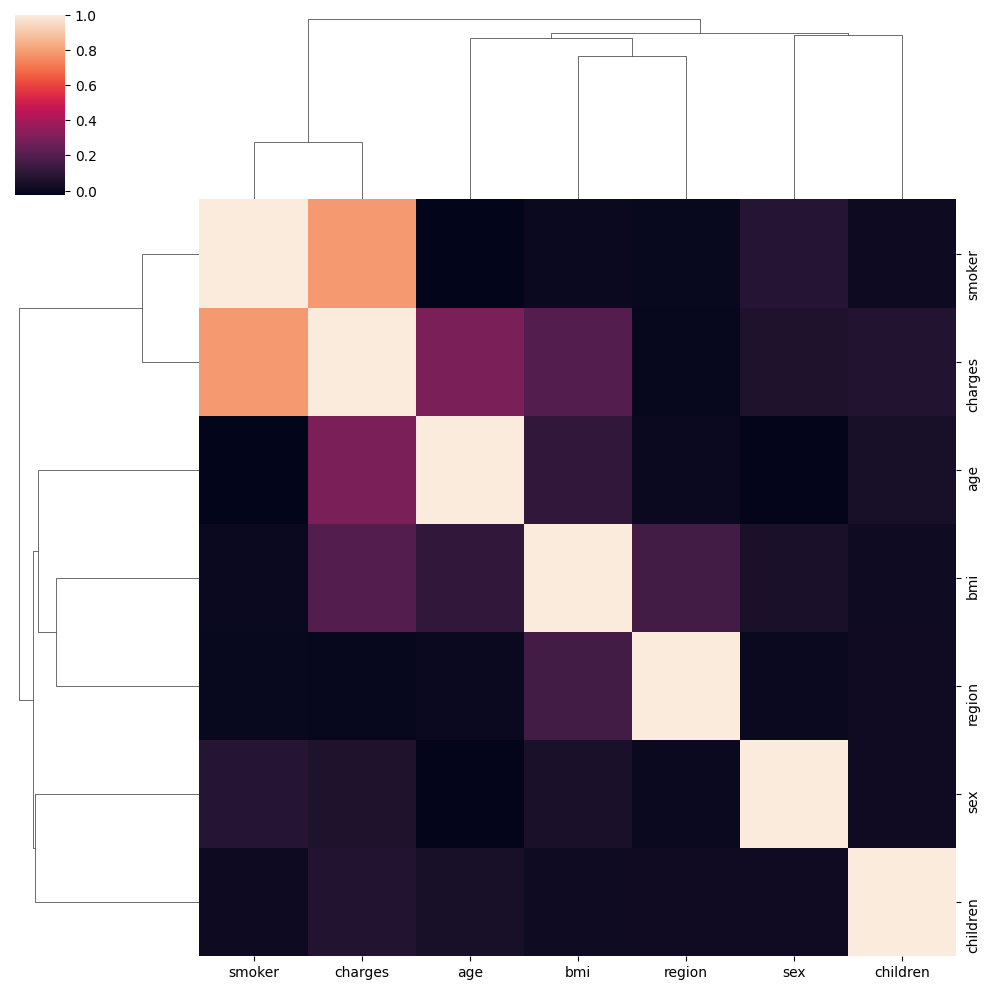

In [64]:
sns.clustermap(test.corr())

### Tests statistiques

In [65]:
result = [
    (f_oneway(
        df['charges'][df['smoker'] == 'Oui'], 
        df['charges'][df['smoker'] == 'Non'])), 
    (f_oneway(
        df['charges'][df['sex'] == 'female'], 
        df['charges'][df['sex'] == 'male'])), 
    (f_oneway(
        df['charges'][df['region'] == 'southwest'], 
        df['charges'][df['region'] == 'southeast'],
        df['charges'][df['region'] == 'northwest'],
        df['charges'][df['region'] == 'northeast'],
    ))]

result

[F_onewayResult(statistic=2175.736861745395, pvalue=1.406722464688005e-282),
 F_onewayResult(statistic=4.513040052520187, pvalue=0.03382075993921887),
 F_onewayResult(statistic=2.926140074755984, pvalue=0.032762872686469366)]

## Analyse variances

In [66]:
df_test = df.drop('charges', axis=1)
label = LabelEncoder()
binaire = LabelBinarizer()

In [67]:
df_test['smoker'] = binaire.fit_transform(df_test['smoker'])
df_test['sex'] = binaire.fit_transform(df_test['sex'])
df_test['region'] = label.fit_transform(df_test['region'])

df_test

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


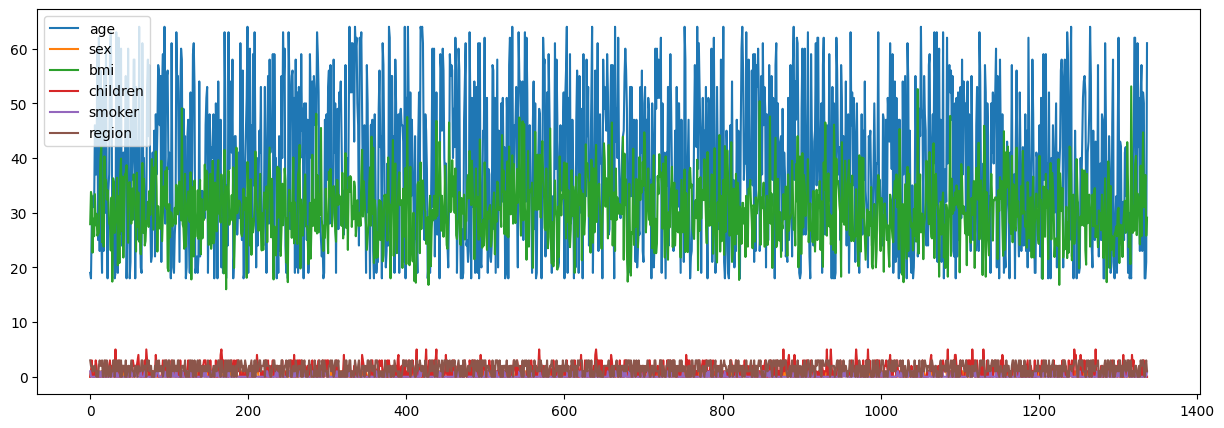

In [68]:
plt.figure(figsize=(15,5))
plt.plot(df_test)
plt.legend(df_test.columns)

In [69]:
df_test.var(axis=0)

age         197.243282
sex           0.250163
bmi          37.217125
children      1.453402
smoker        0.163059
region        1.221485
dtype: float64

## Analyses Bivariées

### Pairplot en fonction du sexe

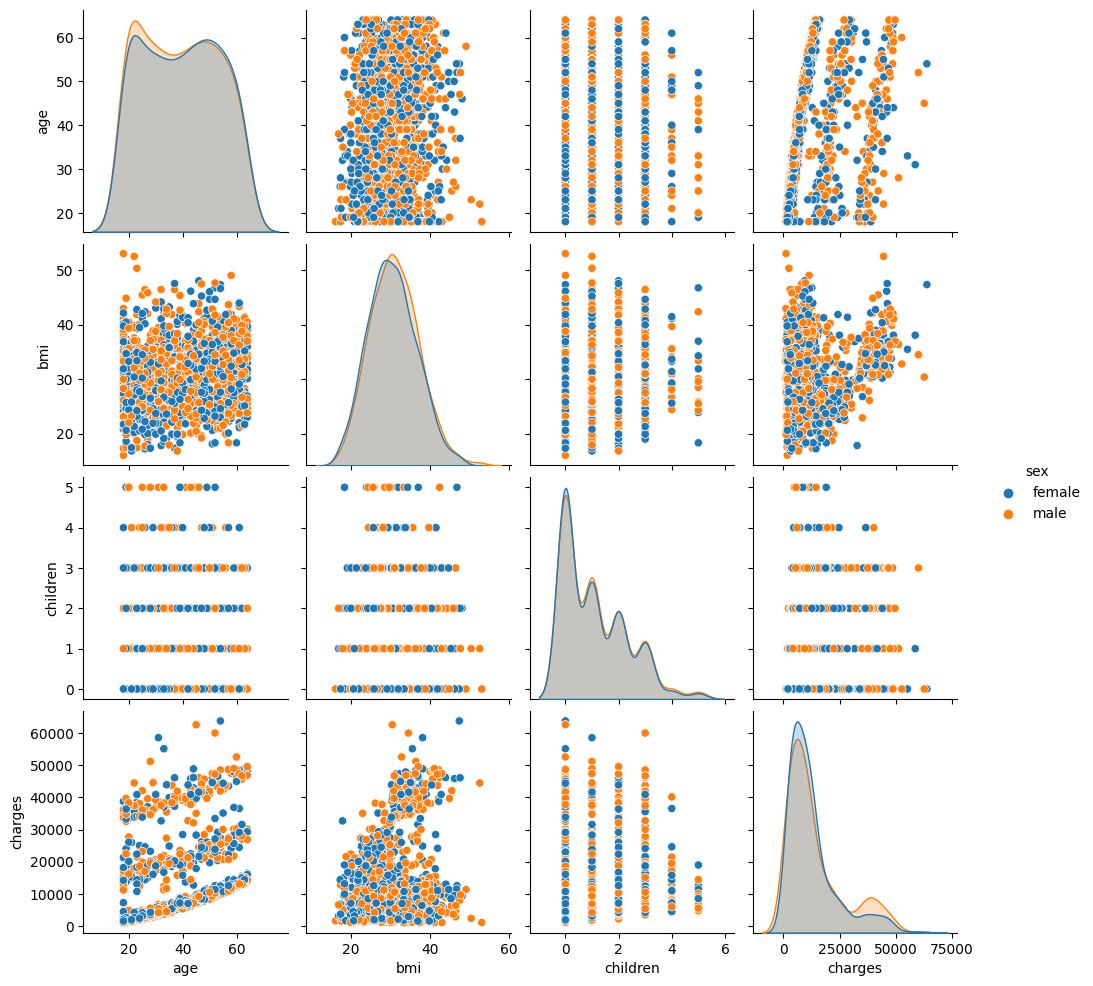

In [70]:
sns.pairplot(df, hue='sex')
plt.show()

### Pairplot en fonction de fumeur ou non

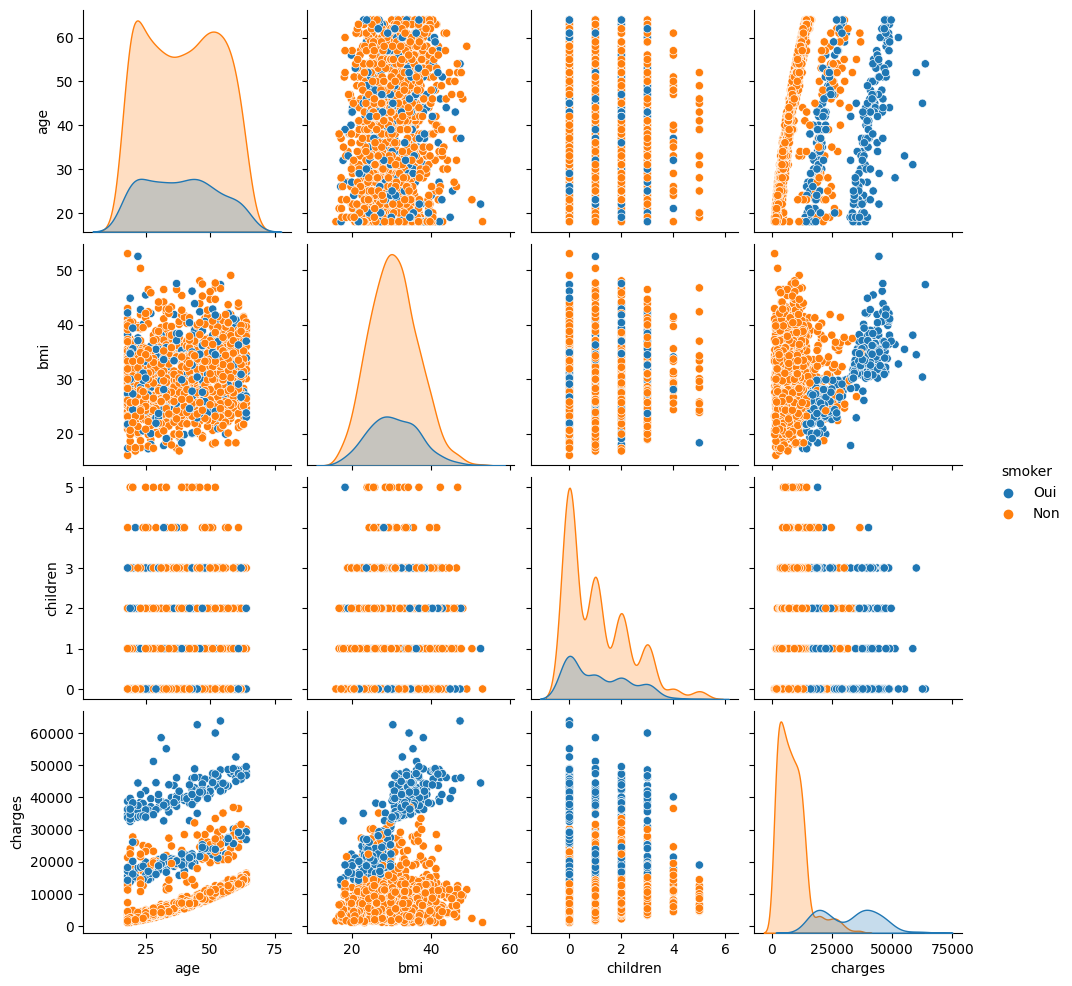

In [71]:
sns.pairplot(df, hue='smoker')

### Pairplot en fonction de la région

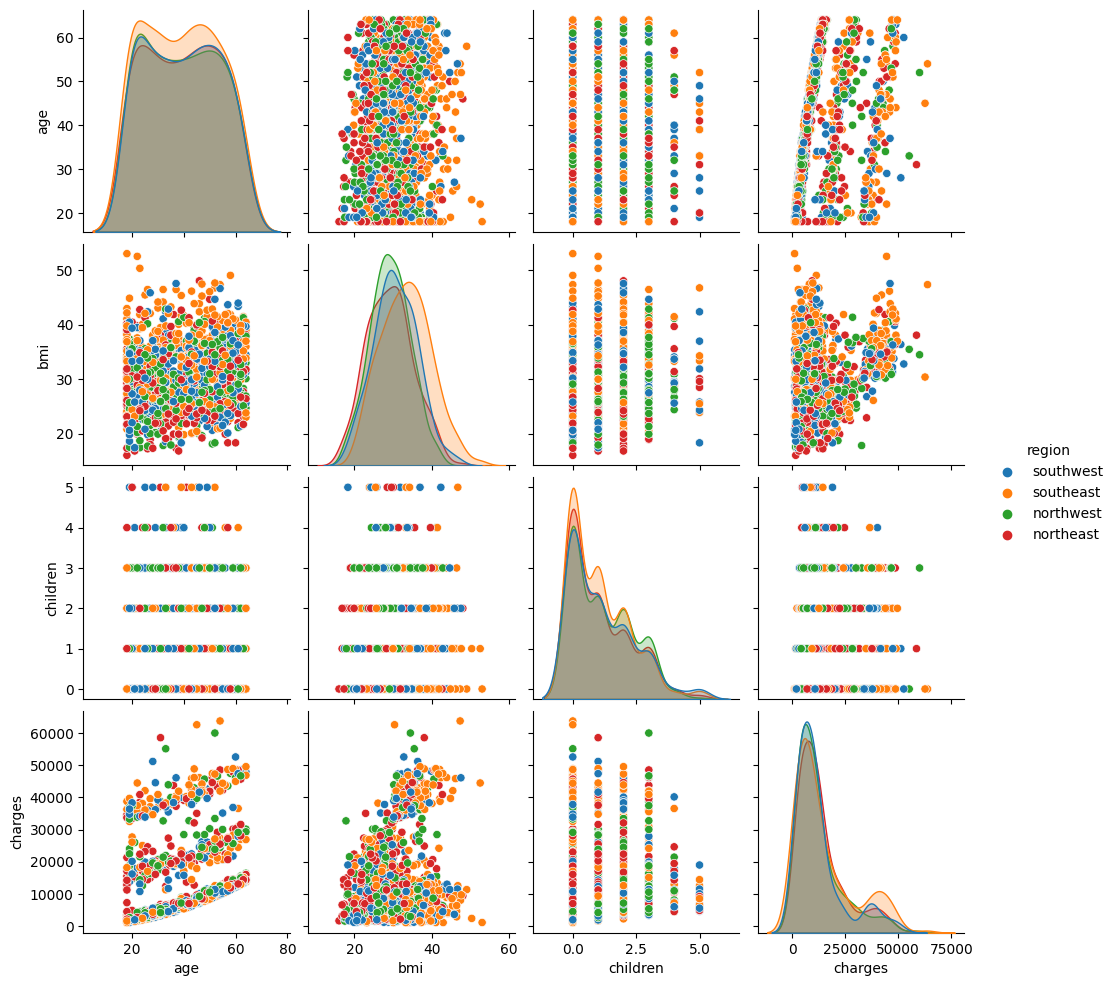

In [72]:
sns.pairplot(df, hue='region')
plt.show()

## Données nettoyées en CSV

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,Oui,southwest,16884.92
1,18,male,33.8,1,Non,southeast,1725.55
2,28,male,33.0,3,Non,southeast,4449.46
3,33,male,22.7,0,Non,northwest,21984.47
4,32,male,28.9,0,Non,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,Non,northwest,10600.55
1334,18,female,31.9,0,Non,northeast,2205.98
1335,18,female,36.9,0,Non,southeast,1629.83
1336,21,female,25.8,0,Non,southwest,2007.94


In [74]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,Oui,southwest,16884.92
1,18,male,33.8,1,Non,southeast,1725.55
2,28,male,33.0,3,Non,southeast,4449.46
3,33,male,22.7,0,Non,northwest,21984.47
4,32,male,28.9,0,Non,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,Non,northwest,10600.55
1334,18,female,31.9,0,Non,northeast,2205.98
1335,18,female,36.9,0,Non,southeast,1629.83
1336,21,female,25.8,0,Non,southwest,2007.94


In [75]:
df.to_csv('../csv/donnees_clean.csv',index=False)